In [54]:
import pandas as pd

In [55]:
# Read file
df = pd.read_csv('hotel_bookings.csv')

In [35]:
# Replace Nan, NULL, NA values with a blank
df=df.fillna('')

In [37]:
# Remove duplicate lines
df=df.drop_duplicates()

In [56]:
# Removing irrelevant columns
df=df.drop(columns=['lead_time', 'meal', 'market_segment', 'distribution_channel', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces'])

In [ ]:
# Error handlings for cancellations
df = df[df['reservation_status'] != 'Canceled']

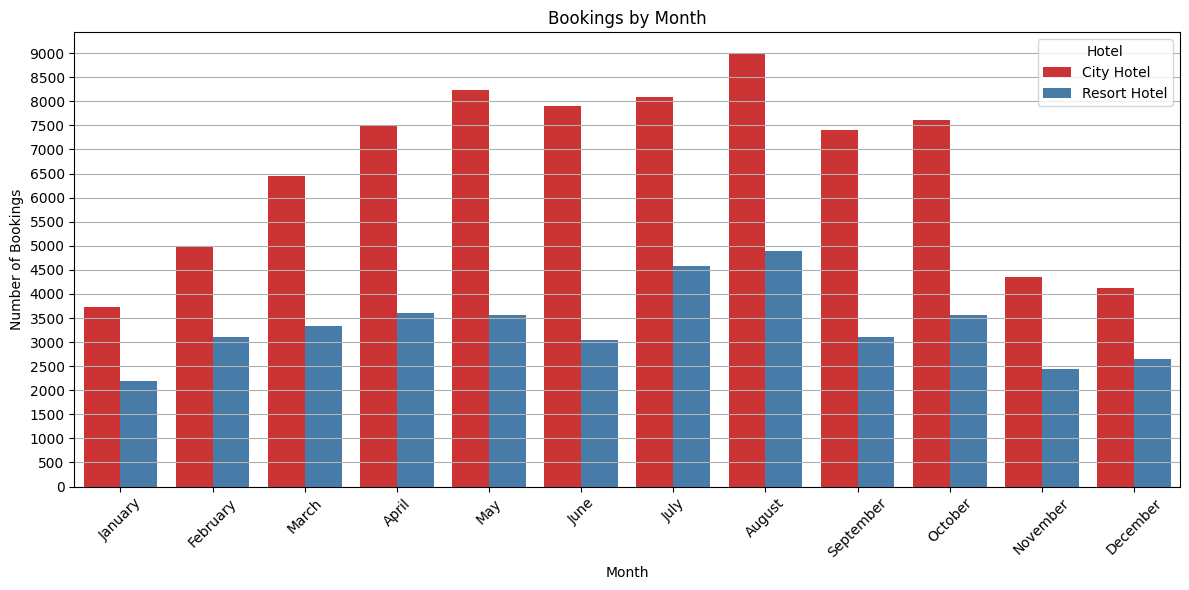

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('hotel_bookings.csv')

# Grouping the data to count bookings by month and hotel
booking_counts = df.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='count')

# Define the correct order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the month column to a categorical type with the defined order
booking_counts['arrival_date_month'] = pd.Categorical(
    booking_counts['arrival_date_month'], 
    categories=month_order, 
    ordered=True
)

# Creating the bar plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=booking_counts, 
            x='arrival_date_month', 
            y='count', 
            hue='hotel', 
            palette='Set1')

# Customize the plot labels and structure
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

# Set custom ticks for the y-axis
y_ticks = np.arange(0, booking_counts['count'].max() + 100, 500)  # Adjust the range and step
plt.yticks(y_ticks)

# Legend for colors by hotel
plt.legend(title='Hotel')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()


With the above plot I wanted to see the booking for each hotel by month in order to pin point which were the busy and slow months. We have a pretty staedy climb from January to August and then a steady decline to Decmeber. High month for both hotels is August and low month for both hotels are January.

C:\Users\johnn\AppData\Local\Temp\ipykernel_11900\3389668561.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=top_countries,


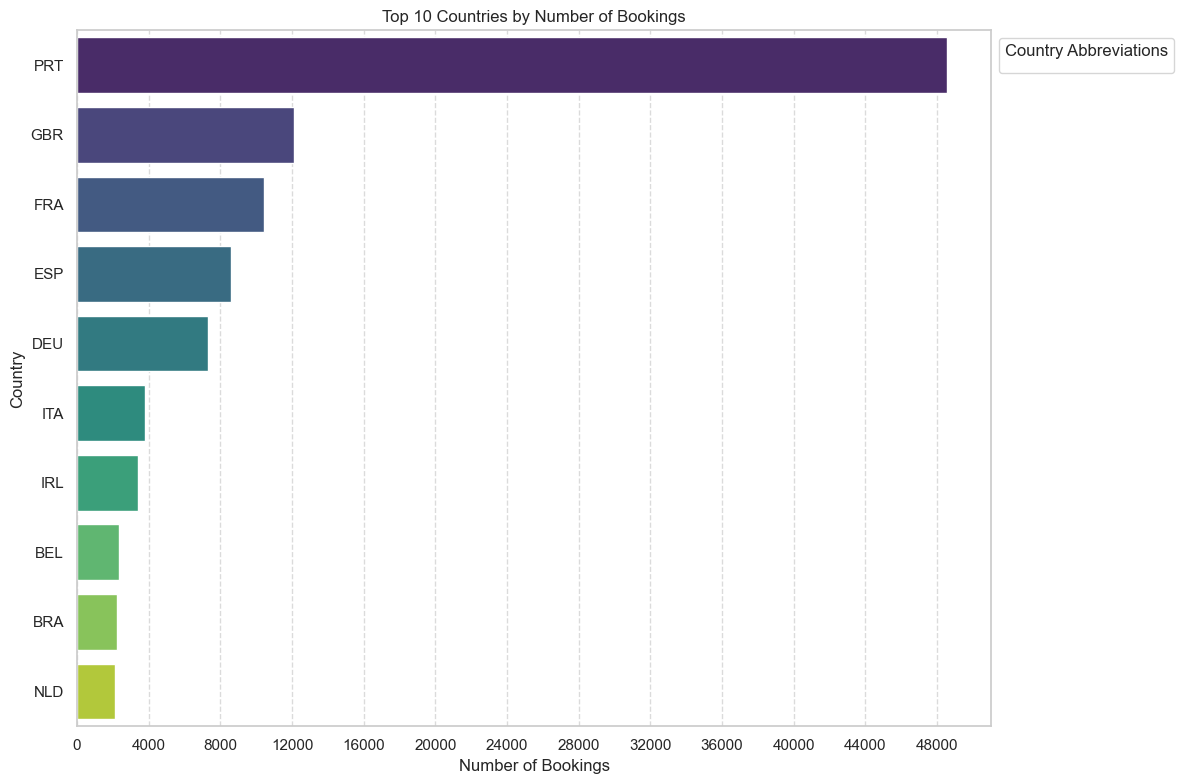

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('hotel_bookings.csv')

# Group the data by country to count occurrences
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Select the top 10 countries
top_countries = country_counts.nlargest(10, 'Count')

# Horizontal bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=top_countries, 
                       y='Country', 
                       x='Count', 
                       palette='viridis')

# Plot labels
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.grid(axis='x')

# Set ticks on the x-axis
plt.xticks(range(0, top_countries['Count'].max() + 1000, 4000))

# Customizing tick Lines
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Abbreviation mapping not able to get this to work for some reason
abbreviations = {
    'Puerto Rico': 'PRT',
    'Great Britain': 'GBR',
    'France': 'FRA',
    'Spain': 'ESP',
    'Germany': 'DEU',
    'Italy': 'ITA',
    'Ireland': 'IRL',
    'Belgium': 'BEL',
    'Brazil': 'BRA',
    'Netherlands': 'NLD'
}

# Legend formatting
handles = []
labels = []
for i, country in enumerate(top_countries['Country']):
    if country in abbreviations:
        handle = plt.Line2D([0], [0], color=bar_plot.patches[i].get_facecolor(), lw=4)
        handles.append(handle)
        labels.append(f"{country} ({abbreviations[country]})")

# Add legend
plt.legend(handles, labels, title='Country Abbreviations', bbox_to_anchor=(1.0, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


The above plot here was an idea to see the top ten contributors to the bookings by country. The overwhelming leader with nearly 50,000 bookings over the course of two years was Puerto Rico. Second is Great Britian with only 12,000. I can not seem to get my legend to display on this plot and I tried a few different things so I am not sure what I am doing wrong. 

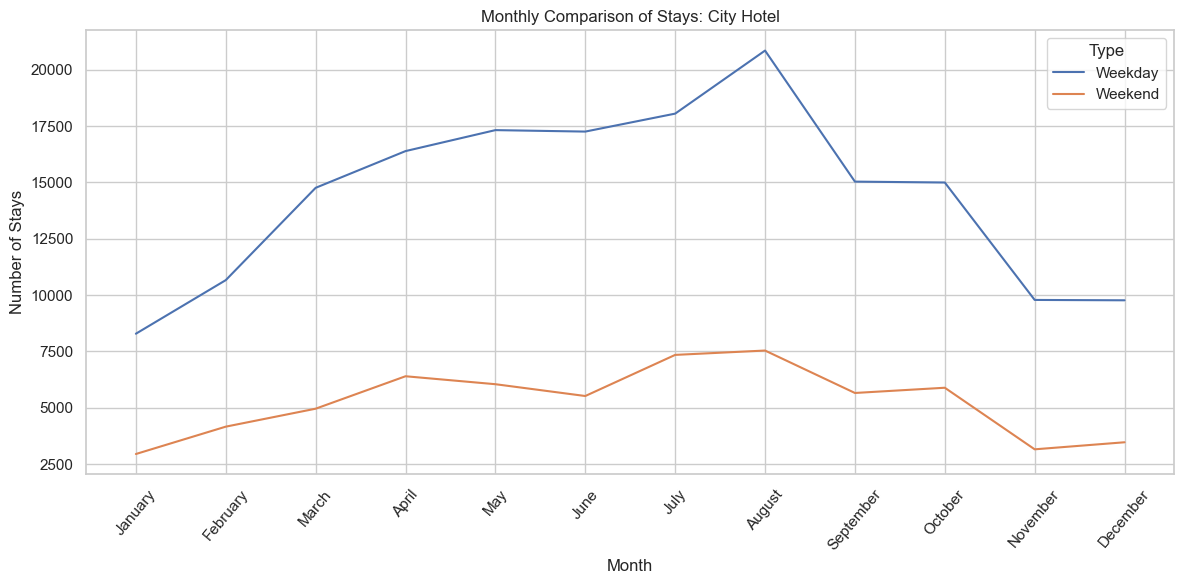

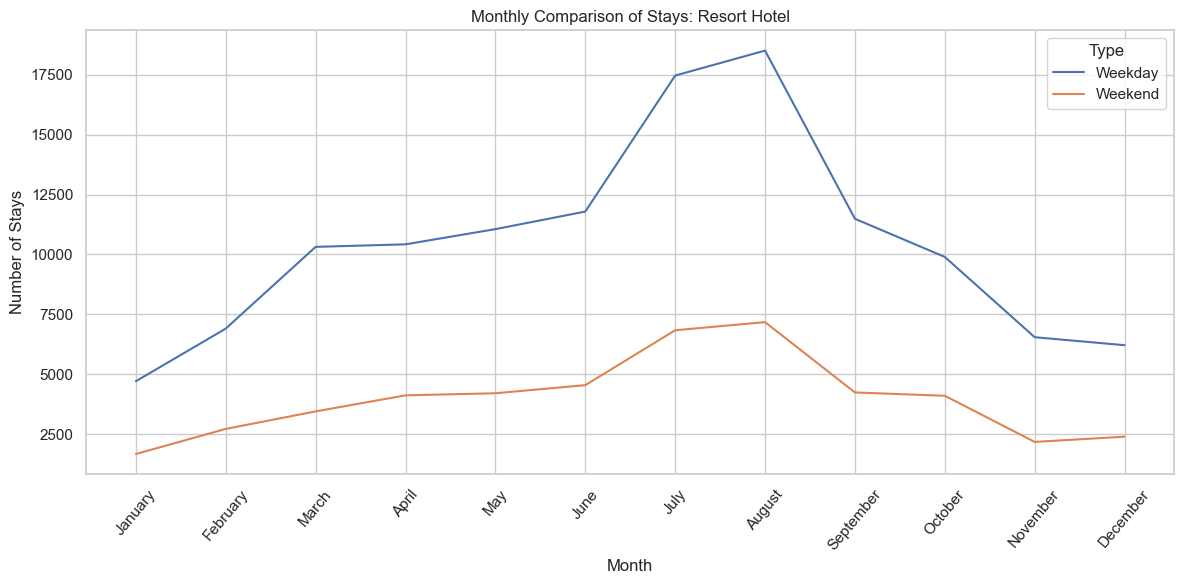

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('hotel_bookings.csv')

# Calculate total weekday stays for each hotel by month
weekday_stays = df.groupby(['arrival_date_month', 'hotel']).agg({'stays_in_week_nights': 'sum'}).reset_index()
weekday_stays['Type'] = 'Weekday'

# Calculate total weekend stays for each hotel by month
weekend_stays = df.groupby(['arrival_date_month', 'hotel']).agg({'stays_in_weekend_nights': 'sum'}).reset_index()
weekend_stays['Type'] = 'Weekend'

# Rename columns for merging
weekday_stays = weekday_stays.rename(columns={'stays_in_week_nights': 'Stays'})
weekend_stays = weekend_stays.rename(columns={'stays_in_weekend_nights': 'Stays'})

# Combine the two DataFrames
combined_stays = pd.concat([weekday_stays, weekend_stays], ignore_index=True)

# Ensure the months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
combined_stays['arrival_date_month'] = pd.Categorical(combined_stays['arrival_date_month'], categories=month_order, ordered=True)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a plot for City Hotel
city_hotel_data = combined_stays[combined_stays['hotel'] == 'City Hotel']
plt.figure(figsize=(12, 6))
sns.lineplot(data=city_hotel_data, x='arrival_date_month', y='Stays', hue='Type', markers=True, dashes=False)
plt.title('Monthly Comparison of Stays: City Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Stays')
plt.xticks(rotation=50)
plt.grid(True)
plt.legend(title='Type', loc='upper right')
plt.tight_layout()
plt.show()

# Create a plot for Resort Hotel
resort_hotel_data = combined_stays[combined_stays['hotel'] == 'Resort Hotel']
plt.figure(figsize=(12, 6))
sns.lineplot(data=resort_hotel_data, x='arrival_date_month', y='Stays', hue='Type', markers=True, dashes=False)
plt.title('Monthly Comparison of Stays: Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Stays')
plt.xticks(rotation=50)
plt.grid(True)
plt.legend(title='Type', loc='upper right')
plt.tight_layout()
plt.show()


So with these two line graphs the idea was to display, similarly to the very first plot, and month to month comparison, but weekend to week day stays by hotel. I thought because the code to make these graphs would be so similiar I could lump the code for both in the same cell to share some code. The data for booking by day type here are nearly identical for both hotels. 

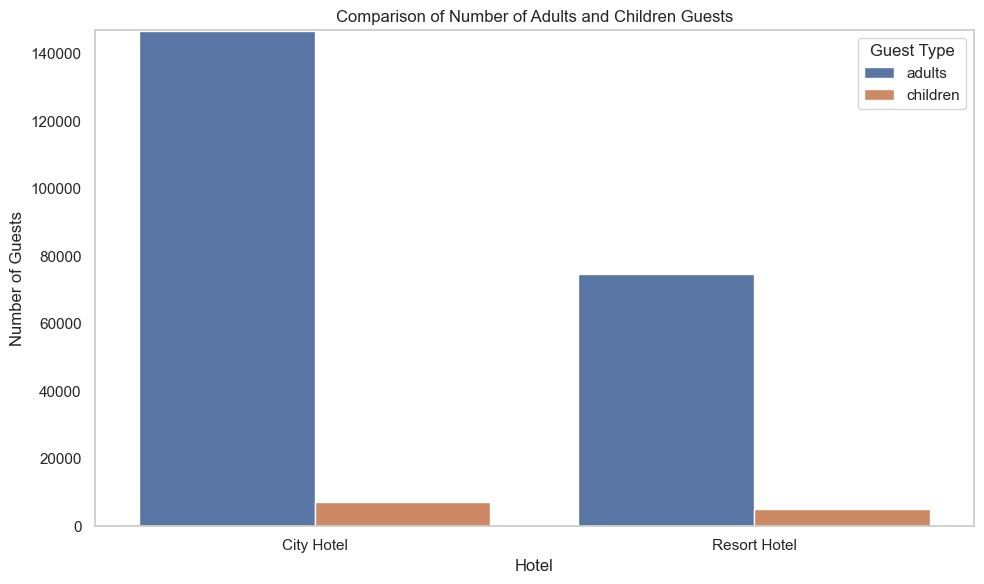

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('hotel_bookings.csv')

# Pull hotels
df_filtered = df[df['hotel'].isin(['City Hotel', 'Resort Hotel'])]

# Calculate total adults and children for each hotel
guest_counts = df_filtered.groupby('hotel').agg({'adults': 'sum', 'children': 'sum'}).reset_index()

# Melt for easier plotting
guest_counts_melted = pd.melt(guest_counts, id_vars='hotel', value_vars=['adults', 'children'],
                               var_name='Guest Type', value_name='Count')

# Set the style for seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=guest_counts_melted, x='hotel', y='Count', hue='Guest Type', palette='deep')

# Customize the plot
plt.title('Comparison of Number of Adults and Children Guests')
plt.xlabel('Hotel')
plt.ylabel('Number of Guests')
plt.ylim(0, guest_counts_melted['Count'].max() + 50)  # Adjust y-axis for better visibility
plt.grid(axis='y')

# Show the plot
plt.legend(title='Guest Type', loc='upper right')
plt.tight_layout()
plt.show()


I saw the columns for adults and children and was curious to see some comparision there but the results were overwhelmingly for adults at both hotels. Way more overall volume of adults staying at the City Hotel.

C:\Users\johnn\AppData\Local\Temp\ipykernel_11900\956663275.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hotel', y='total_stays', data=average_stays, palette=custom_palette)


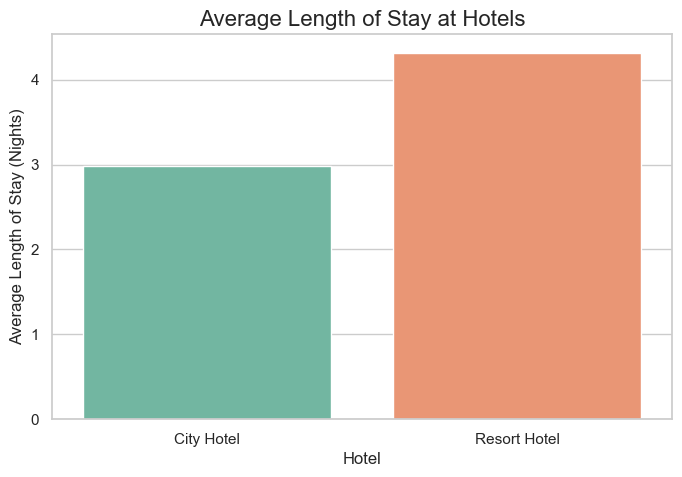

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('hotel_bookings.csv')

# Calculate the total stays
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate the average length of stay for each hotel
average_stays = df.groupby('hotel')['total_stays'].mean().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create a unique color palette
custom_palette = sns.color_palette("Set2", n_colors=len(average_stays))

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='hotel', y='total_stays', data=average_stays, palette=custom_palette)

# Adding titles and labels
plt.title('Average Length of Stay at Hotels', fontsize=16)
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Average Length of Stay (Nights)', fontsize=12)

# Show the plot
plt.show()


This plot was to see what the average length of stay was between the hotels. Although the City Hotel seems to have more people on average staying there people stay an average of a day longer at the Resort Hotel. 